In [1]:
from multicell_utils.builder import ModelBuilder, ProcessCreator, ObjectCreator

In [2]:
new_object = ObjectCreator(
    type='ExtracellularMatrix',
    inherits_from='Material',
    attributes={'density': 1.0, 'stiffness': 1.0},
)
new_object.validate()
new_object.register(overwrite=True)
new_object.save(filename='ecm_object.json')

new_process = ProcessCreator(
    type='Collision',
    participating_objects=['ExtracellularMatrix', 'Cell'],
)
new_process.validate()
new_process.register(overwrite=True)
new_process.save(filename='collision_process.json')

Schema saved to schema/object/ecm_object.json
Schema saved to schema/process/collision_process.json


In [3]:
demo_model = ModelBuilder(model_name='demo')
demo_model.add_object(name='chemical field', object_type='Field')
demo_model.add_object(name='extracellular matrix', object_type='ExtracellularMatrix')
demo_model.add_process(name='collision', process_type='Collision', participating_objects=['extracellular matrix'])

In [4]:
demo_model.validate()
demo_model.save('demo_model2.json')

Model saved to models/demo_model2.json


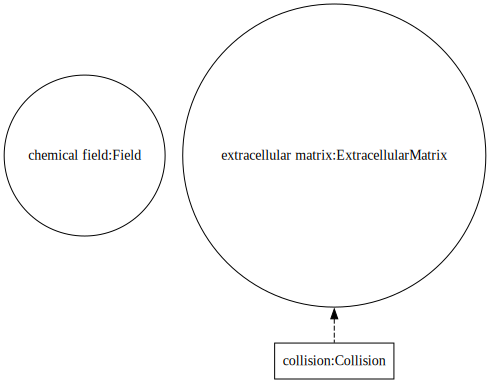

In [5]:
demo_model.graph()


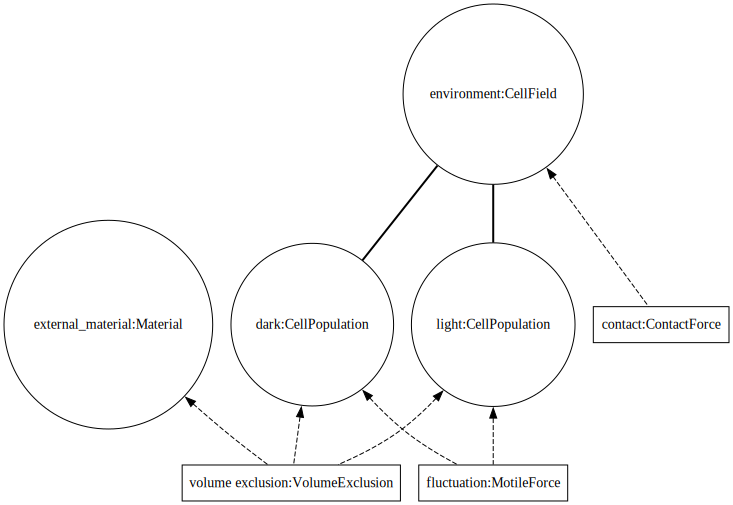

In [6]:
demo2 = ModelBuilder(model_file='cell_sorting')
demo2

In [7]:
demo2.graph()

ModelBuilder({ 'id': 'model_000006',
  'name': 'cell_sorting',
  'objects': { 'dark': { 'attributes': {},
                         'boundary_conditions': {},
                         'contained_objects': [],
                         'type': 'CellPopulation'},
               'environment': { 'attributes': {},
                                'boundary_conditions': {},
                                'contained_objects': ['dark', 'light'],
                                'type': 'CellField'},
               'external_material': { 'attributes': {},
                                      'boundary_conditions': {},
                                      'contained_objects': [],
                                      'type': 'Material'},
               'light': { 'attributes': {},
                          'boundary_conditions': {},
                          'contained_objects': [],
                          'type': 'CellPopulation'}},
  'processes': { 'contact': { 'attributes': {},
            